## Data Dictionary: German Credit

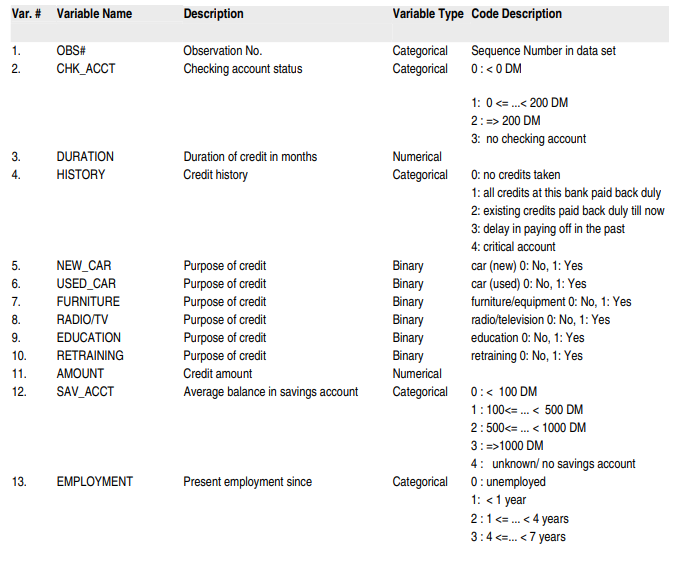

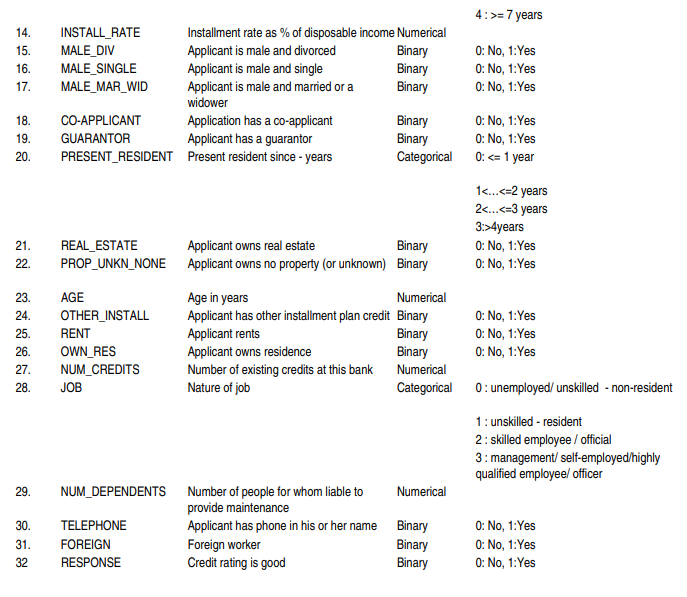

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, optimizers, Input, callbacks
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('GermanCredit.xls')
df

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,...,31,0,0,1,1,1,1,0,0,1
996,997,0,30,2,0,1,0,0,0,0,...,40,0,0,1,1,3,1,1,0,1
997,998,3,12,2,0,0,0,1,0,0,...,38,0,0,1,1,2,1,0,0,1
998,999,0,45,2,0,0,0,1,0,0,...,23,0,0,0,1,2,1,1,0,0


[]

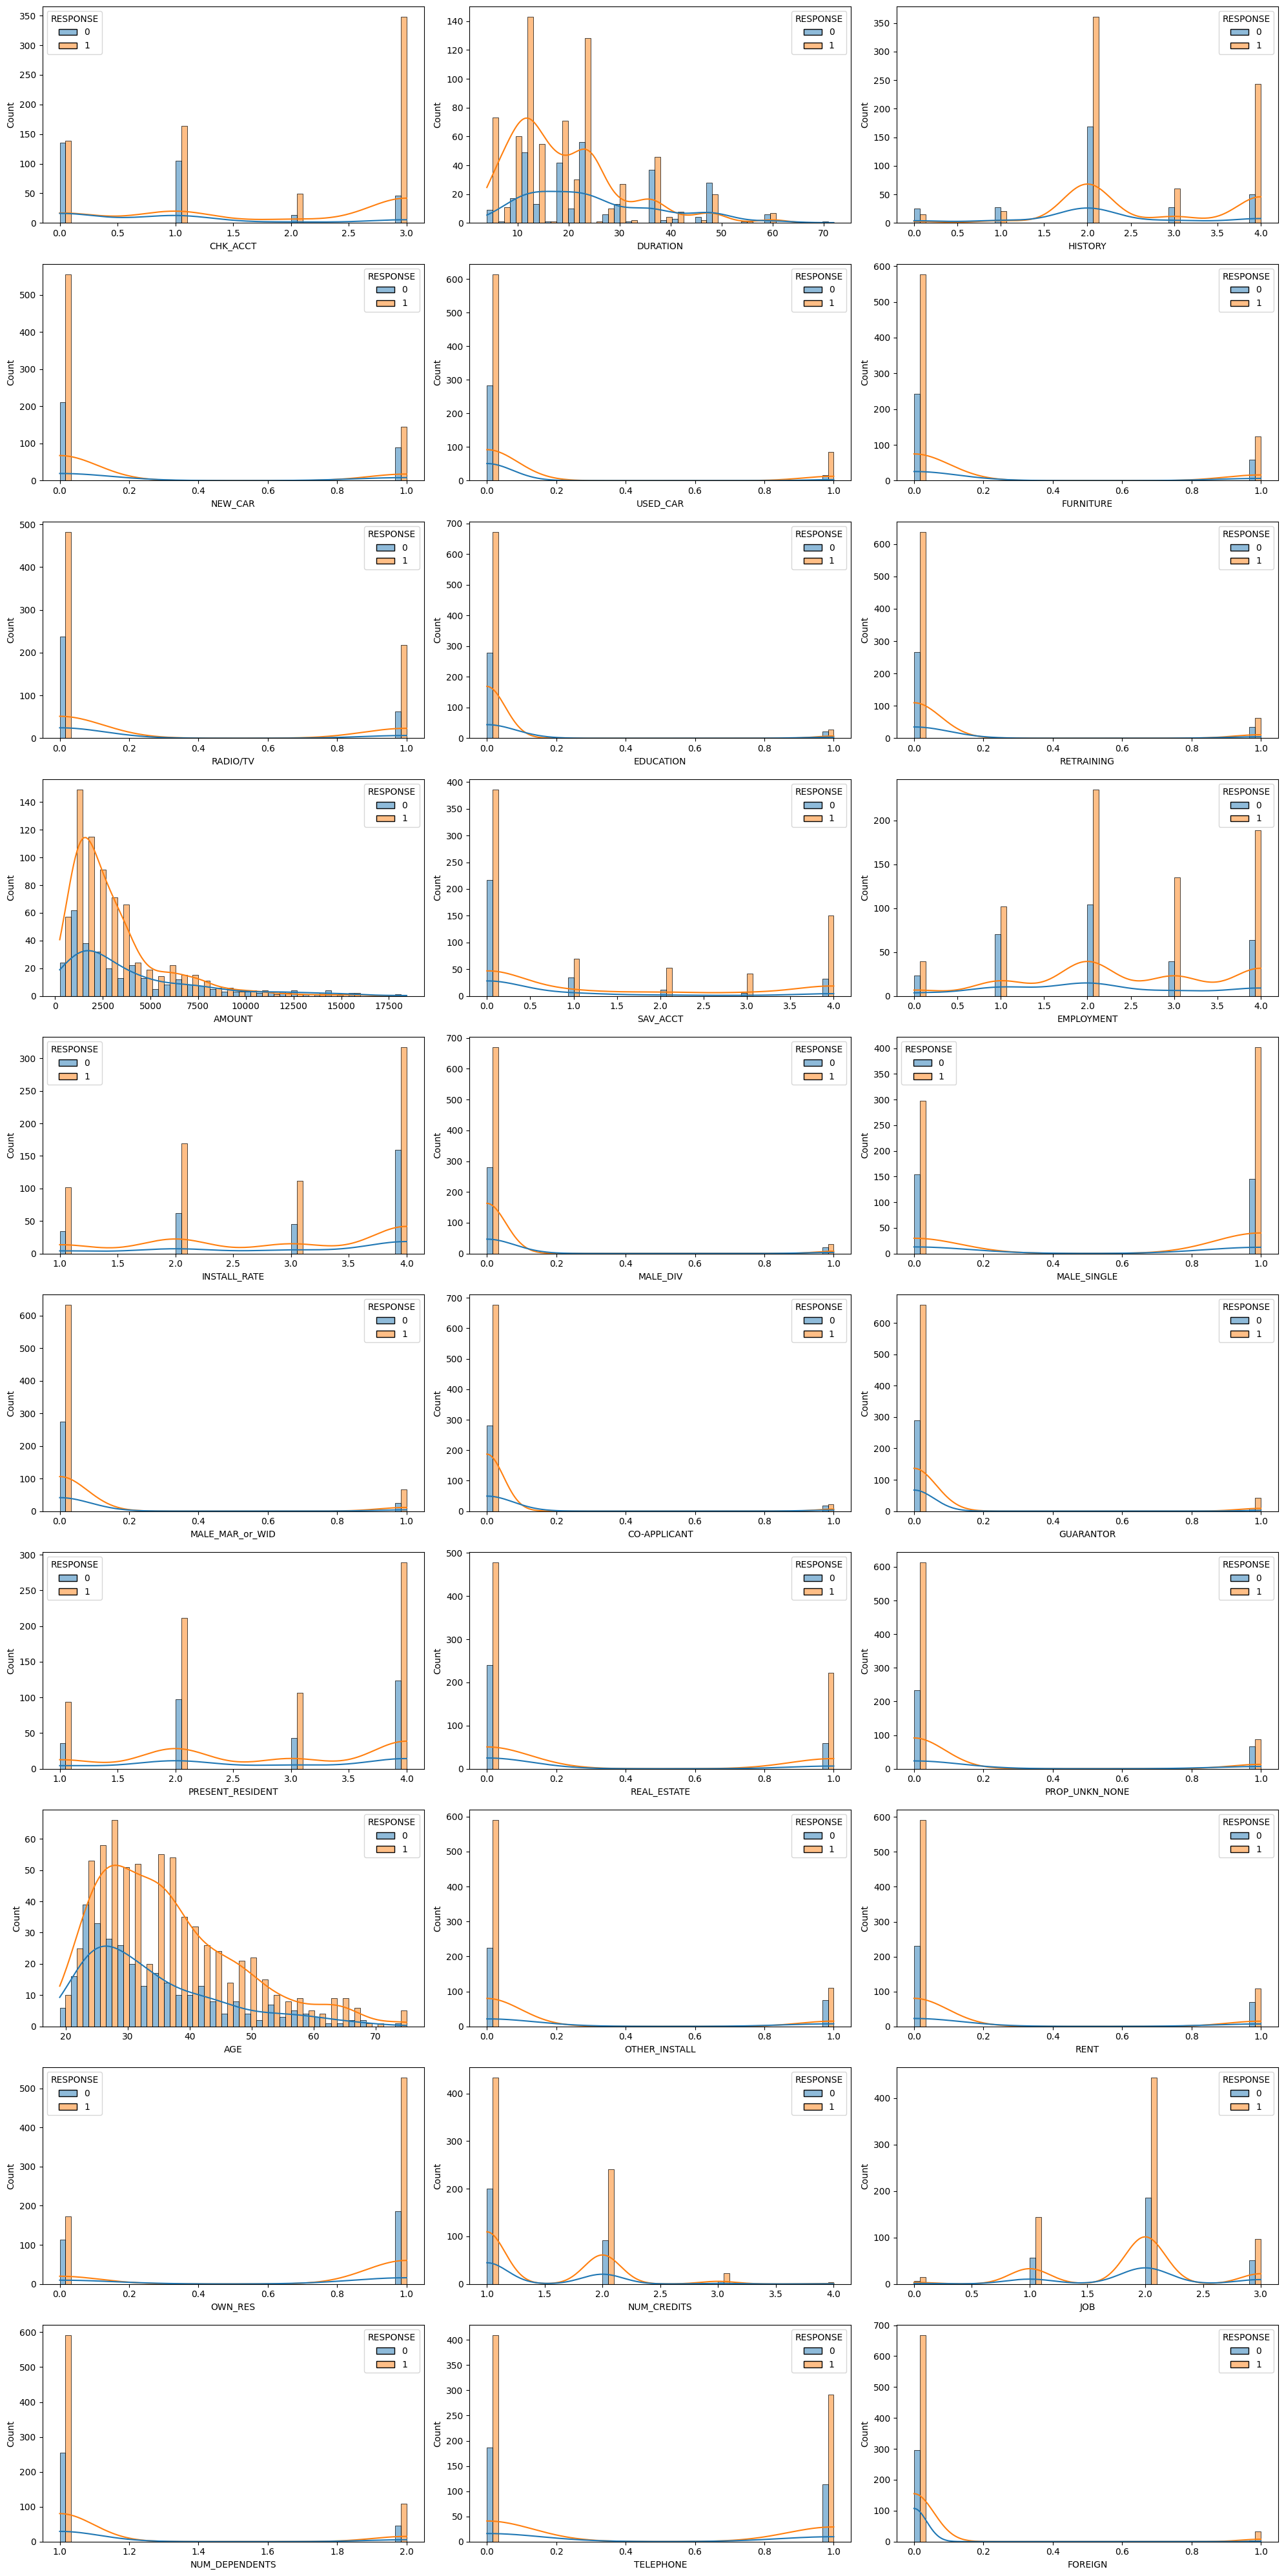

In [4]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
ncol=0
cols = df.columns[1:-1]
for row in range(10):
    for col in range(3):
        sns.histplot(data=df, x=cols[ncol], hue='RESPONSE', bins=30, kde=True, ax=ax[row][col], multiple='dodge')
        ncol+=1
plt.tight_layout()
plt.plot()

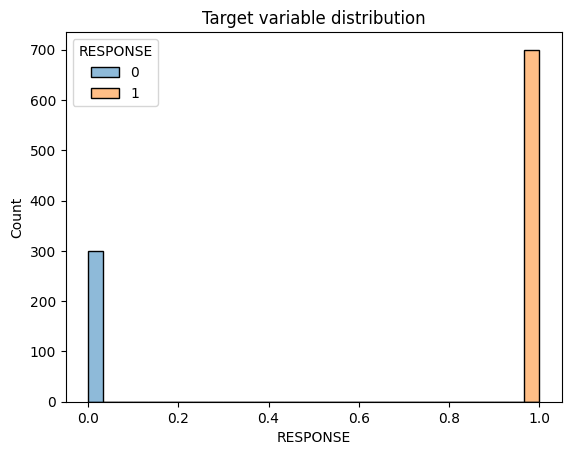

In [5]:
# target variable
sns.histplot(data=df, x='RESPONSE', hue='RESPONSE', bins=30)
plt.title('Target variable distribution')
plt.show()

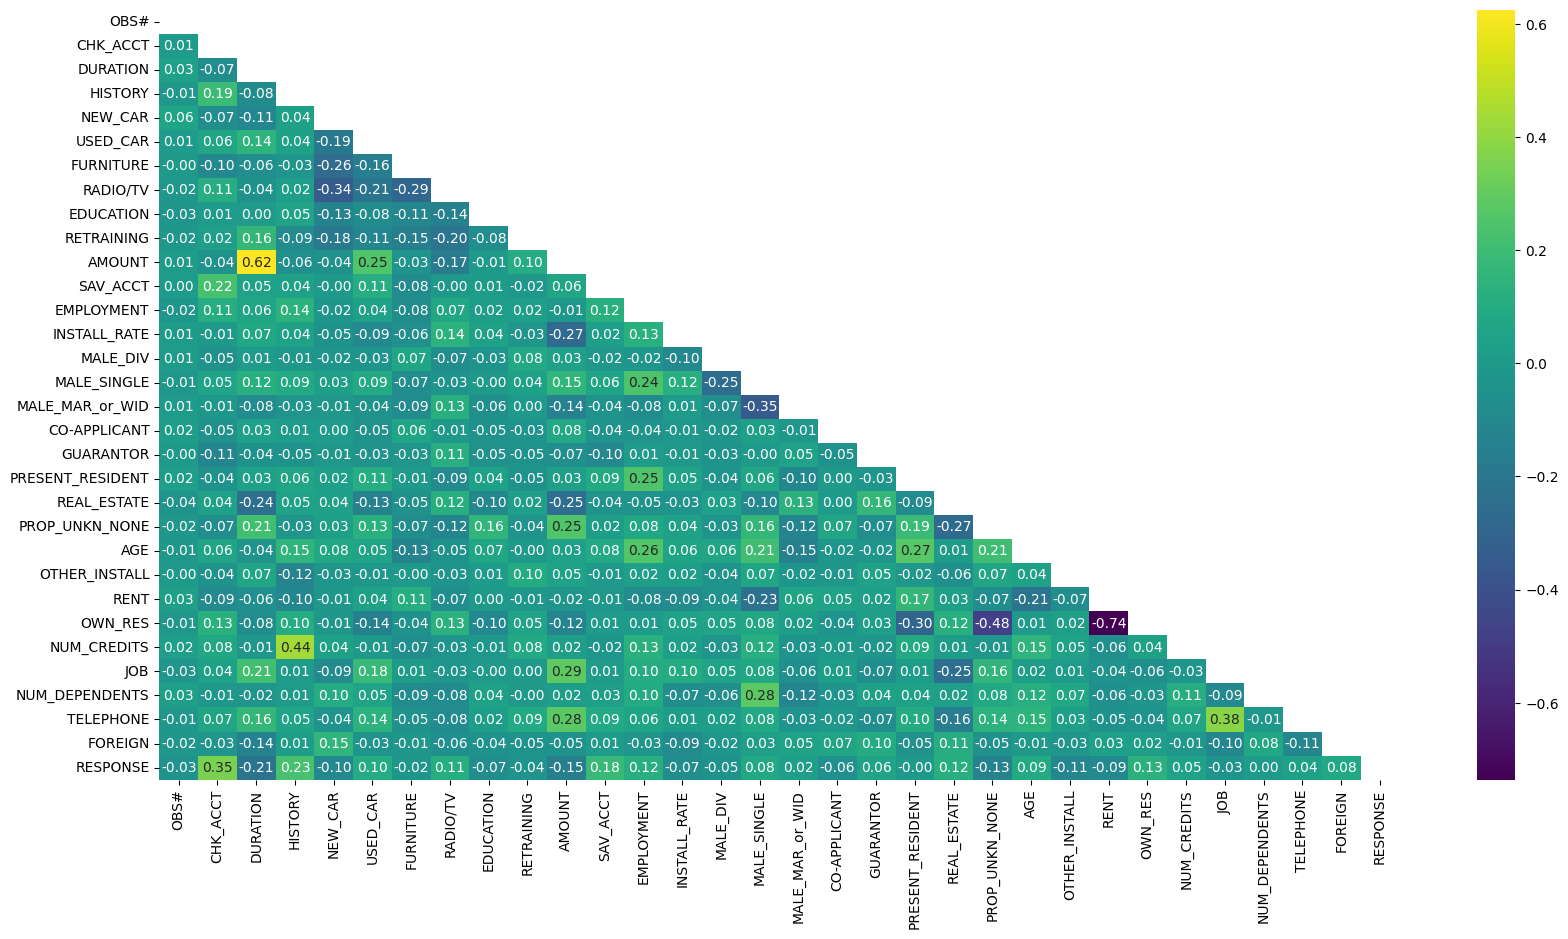

In [6]:
# corrleration matrix
plt.figure(figsize=(20,10))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2f', cmap='viridis')
plt.show()

In [7]:
# independent and dependent variable
X = df.drop(['OBS#', 'RESPONSE'], axis=1)
y = df['RESPONSE']

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [9]:
# using SMOTE technique to balance target variable
smote = SMOTE(sampling_strategy='minority', random_state=0, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

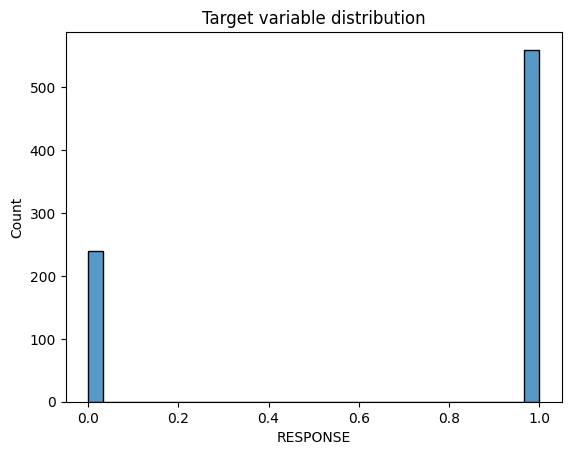

In [16]:
sns.histplot(data=y_train, bins=30)
plt.title('Target variable distribution')
plt.show()

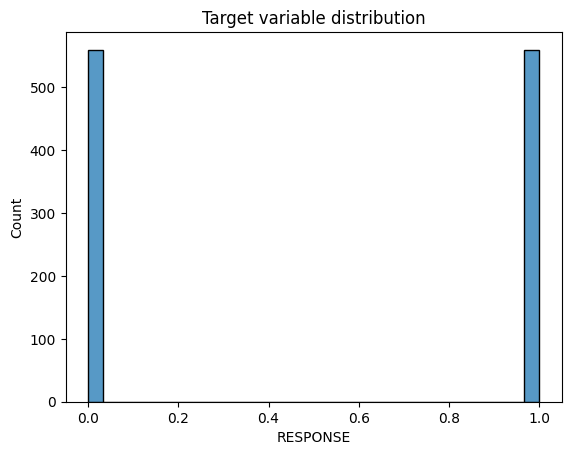

In [17]:
sns.histplot(data=y_train_resampled, bins=30)
plt.title('Target variable distribution')
plt.show()

              precision    recall  f1-score   support

           0       0.49      0.50      0.50        60
           1       0.78      0.78      0.78       140

    accuracy                           0.69       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.70      0.69      0.70       200

----------------------------------------------------------------------------------------------------


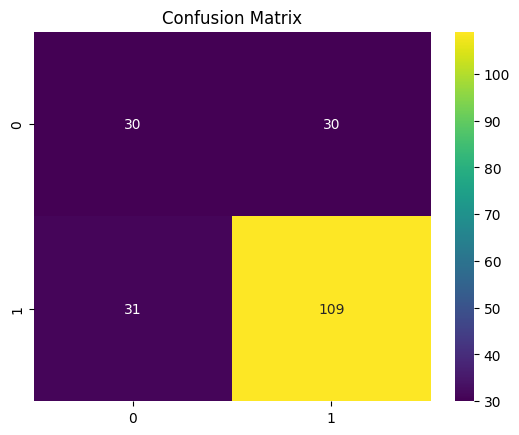

In [10]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('-'*100)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model = models.Sequential([
    Input(shape=(30,)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'], loss='binary_crossentropy')
earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50)

In [12]:
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=64, validation_split=0.2, callbacks=earlystopping)

Epoch 1/300


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4329 - loss: 0.9637 - val_accuracy: 0.0089 - val_loss: 1.5902
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5653 - loss: 0.7749 - val_accuracy: 0.0045 - val_loss: 1.6621
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 0.6904 - val_accuracy: 0.0759 - val_loss: 1.3572
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.6580 - val_accuracy: 0.2188 - val_loss: 1.1171
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - loss: 0.6071 - val_accuracy: 0.2679 - val_loss: 1.0562
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.5633 - val_accuracy: 0.3884 - val_loss: 0.9113
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - loss: 0.5987 - val_accuracy: 0.4598 - val_loss: 0.8364
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5259 - val_accuracy: 0.5312 - val_loss: 0.7

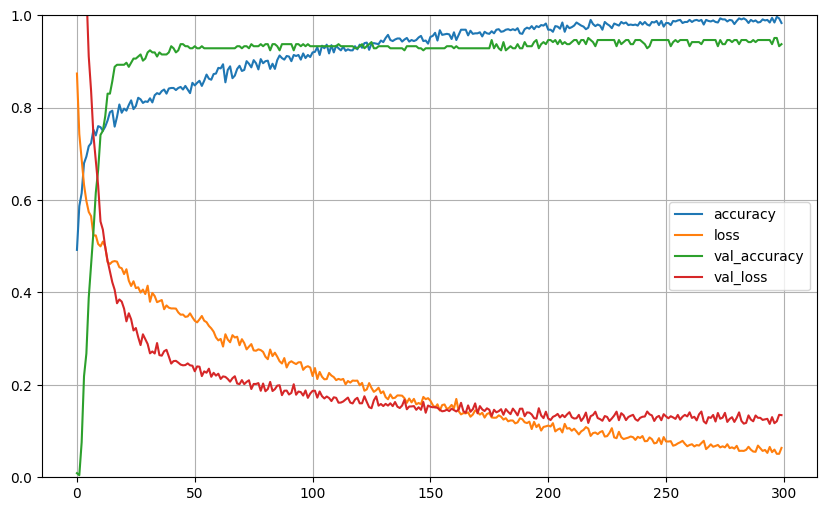

In [13]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7242 - loss: 0.9941


[1.0245505571365356, 0.7250000238418579]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        60
           1       0.79      0.82      0.81       140

    accuracy                           0.72       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200

--------------------------------------------------


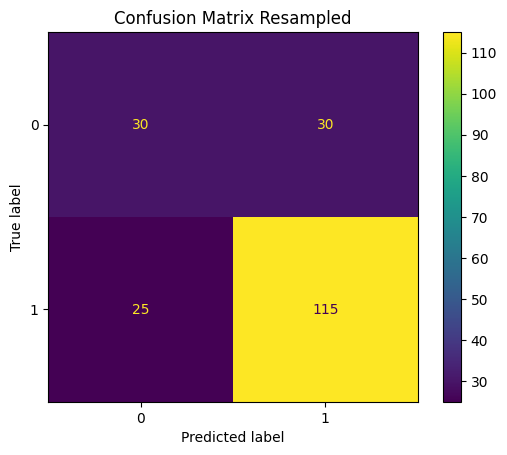

In [15]:
y_pred = [1 if x>=0.5 else 0 for x in model.predict(X_test)]
print(classification_report(y_test, y_pred))
print('-'*50)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title('Confusion Matrix Resampled')
plt.show()